<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/06_linear_regression_R2_treningowy_testowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.2.2'

In [2]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=10.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')


data shape: (1000, 1)
target shape: (1000,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


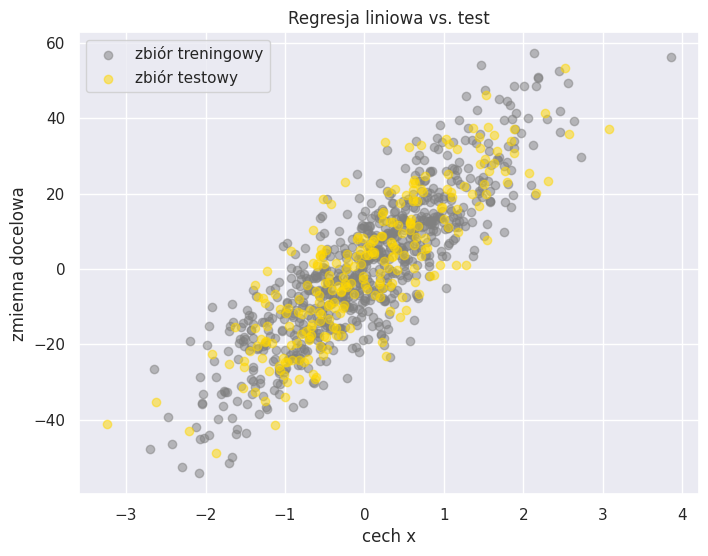

In [4]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa vs. test')
plt.xlabel('cech x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.show()

In [5]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [6]:
regression.score(X_train, y_train)

0.737074017523178

In [7]:
regression.score(X_test, y_test)

0.7083902193091437

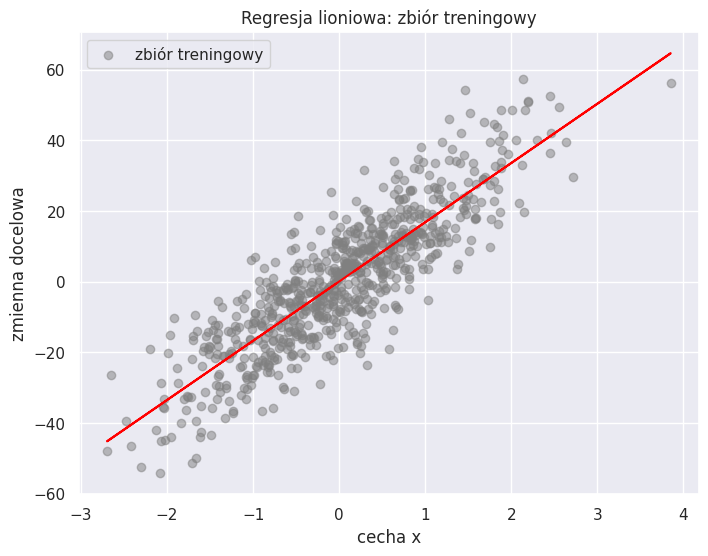

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Regresja lioniowa: zbiór treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regression.intercept_ + regression.coef_ * X_train, color='red')
plt.legend()
plt.show()

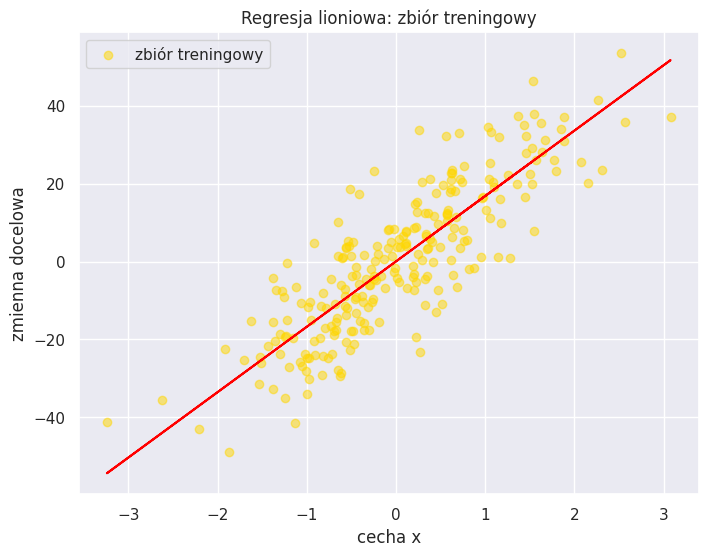

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Regresja lioniowa: zbiór treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór treningowy', color='gold', alpha=0.5)
plt.plot(X_test, regression.intercept_ + regression.coef_ * X_test, color='red')
plt.legend()
plt.show()

### predykcja

In [10]:
y_pred = regression.predict(X_test)

predictions = pd.DataFrame(data={'y_true' : y_test, 'y_pred' : y_pred})
predictions.head()

,y_true,y_pred
0,29.087355,25.570258
1,3.199129,5.935171
2,30.910198,31.589937
3,-11.564760,-16.496961
4,-27.817462,-10.809987


In [11]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,29.087355,25.570258,3.517097
1,3.199129,5.935171,-2.736042
2,30.910198,31.589937,-0.679739
3,-11.564760,-16.496961,4.932201
4,-27.817462,-10.809987,-17.007475


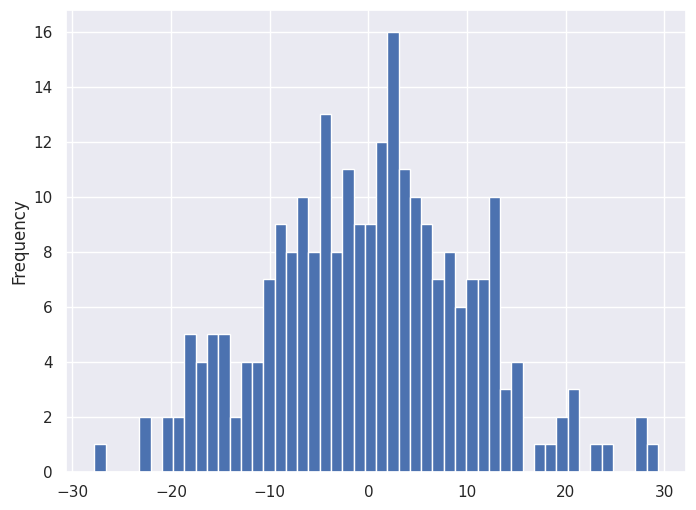

In [12]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))